In [ ]:
import nibabel as nib

def apri_file_nii(percorso_relativo):
    # Carica il file .nii.gz
    img = nib.load(percorso_relativo)
    
    # Ottieni le informazioni del file
    header = img.header
    data = img.get_fdata()
    
    return header, data

# Esempio di utilizzo
percorso = '..\\..\\Task06_Lung\\Task06_Lung\\imagesTr\\lung_001.nii.gz'
header, data = apri_file_nii(percorso)
#print(header)
print(data.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the data array to 1D
data_flat = data.flatten()

# Plot the histogram
plt.hist(data_flat, bins=100, color='blue', edgecolor='black')
plt.title('Histogram of Data Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(f"Mean: {np.mean(data_flat)}")
print(f"Median: {np.median(data_flat)}")
print(f"Standard Deviation: {np.std(data_flat)}")
print(f"Variance: {np.var(data_flat)}")
print(f"Minimum: {np.min(data_flat)}")
print(f"Maximum: {np.max(data_flat)}")

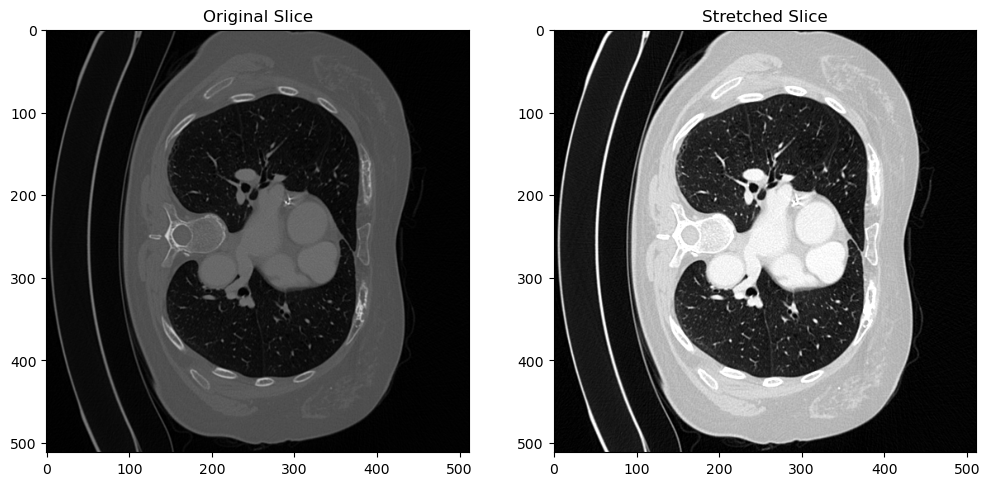

In [12]:
# Funzione per fare il contrast stretching
def contrast_stretching(data, low_percentile=2, high_percentile=98):
    min_val = np.percentile(data, low_percentile)
    max_val = np.percentile(data, high_percentile)
    data_stretched = (data - min_val) / (max_val - min_val) * 255
    data_stretched[data_stretched < 0] = 0
    data_stretched[data_stretched > 255] = 255
    return data_stretched

# Prendi lo slice a metà
mid_slice = data.shape[2] // 2
original_slice = data[:, :, mid_slice]

# Stretching del contrasto
stretched_slice = contrast_stretching(original_slice)

# Plot delle immagini a confronto
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_slice, cmap='gray')
axes[0].set_title('Original Slice')
axes[1].imshow(stretched_slice, cmap='gray')
axes[1].set_title('Stretched Slice')
plt.show()

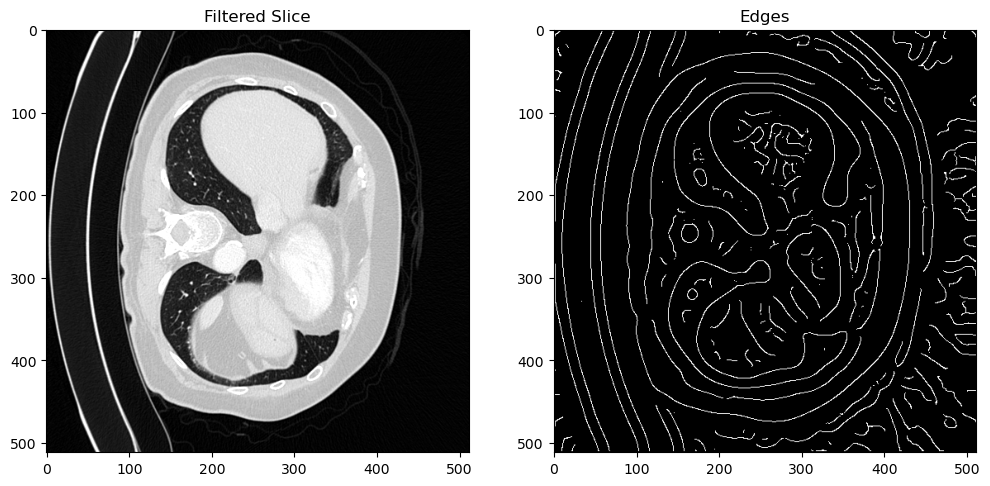

In [27]:
from skimage import feature
from scipy.ndimage import median_filter
# Applica un filtro mediano
original_slice = data[:, :, 70]
#filtered_slice = median_filter(original_slice, size=10)
filtered_slice= contrast_stretching(original_slice)
# Trova i contorni usando l'algoritmo Canny
edges = feature.canny(filtered_slice, sigma=6)

# Plot dell'immagine originale e dei contorni
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(filtered_slice, cmap='gray')
axes[0].set_title('Filtered Slice')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edges')
plt.show()

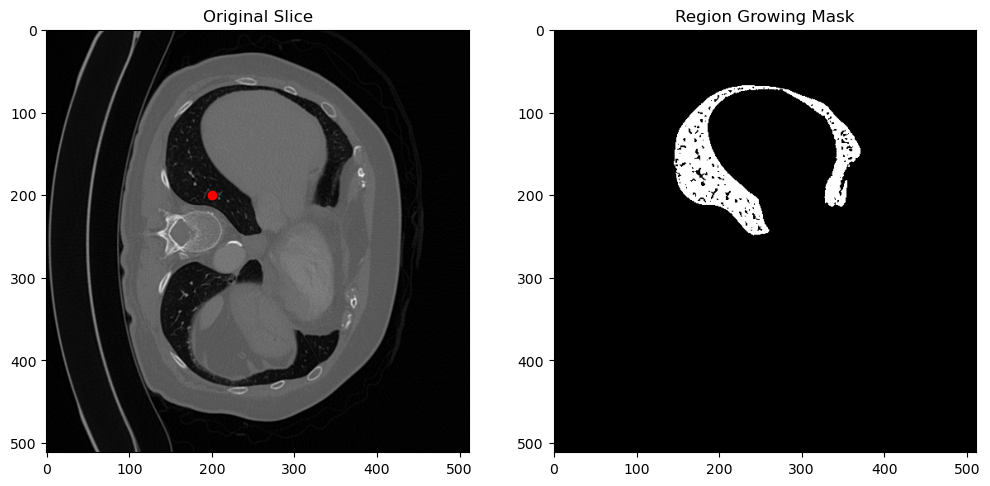

In [35]:
from skimage.segmentation import flood
import random

# Seleziona un punto casuale all'interno dello slice
#random.seed(42)  # Per riproducibilità
x = 200
y = 200
seed_point = (x, y)

# Applica il region growing
mask = flood(original_slice, seed_point, tolerance=180)

# Plot dell'immagine originale e della maschera trovata
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_slice, cmap='gray')
axes[0].set_title('Original Slice')
axes[0].plot(y, x, 'ro')  # Mostra il punto di partenza

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Region Growing Mask')
plt.show()